In [9]:
#importing and makings PANDAS data frames 

import pandas as pd
%matplotlib inline
from pathlib import Path
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from pathlib import Path
csvpath = Path('C:/Users/johnh/Desktop/PREWORK_JSH/Module-8/yen.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [26]:
#Data preperation in order to get the returns and lagged returns  

df['Return'] = df.Settle.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()


In [29]:
train = df['1976':'2017']
test=df['2018']

In [30]:
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [31]:
# Create and fit model to the data, make predictions
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [32]:


# Add a column of "out-of-sample" predictions to that dataframe: 
out_of_sample_results = y_test.to_frame()
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001555779EF88>,
      dtype=object)

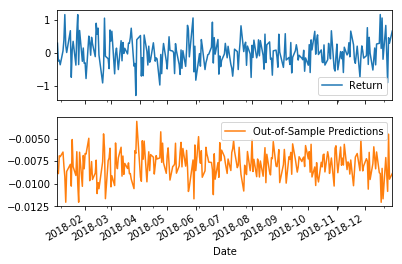

In [33]:
 # Plot the out-of-sample results for 2018
out_of_sample_results.plot(subplots=True)

In [34]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["Return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.4295191816140605


In [42]:
print(f"Out-of-sample Mean Squared Error (MSE):out_of_sample_mse: {out_of_sample_mse}")

Out-of-sample Mean Squared Error (MSE):out_of_sample_mse: 0.1844867273744123


In [35]:
weeks = df.index.to_period("w").unique()
print(weeks[0])

2014-02-17/2014-02-23


In [36]:
# Declare the training window of 12 weeks
# Define the imeframe of rolling windows
training_window = 12
timeframe = len(weeks) - training_window - 1
print(timeframe)

283


In [37]:
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [38]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)  

In [39]:
Results = pd.concat([all_actuals, all_predictions], axis=1)

# 2019 Data
results_2019 = Results.loc['2019':]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001555774C7C8>,
      dtype=object)

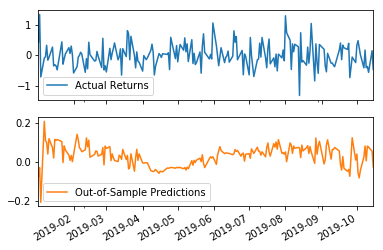

In [40]:
 # Plot the results
results_2019.plot(subplots=True)

In [41]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 

mse = mean_squared_error(
    results_2019["Actual Returns"],
    results_2019["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.4295191816140605
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 0.40333088574733467
